# Modelling with logistic regression in Python

## Implementing a logistic regression model in Python of the *gestational diabetes* dataset
We will use logistic regression to produce a classification model for *gestational diabetes*. The classification task will be to predict the condition in pregnant women, or in other words, to classify pregnant women suffering the condition from healthy women. The *pima indians diabetes database* will be used, which is publicly availble. It is also available under the following link:
https://raw.githubusercontent.com/iaolier/7021DATSCI/main/data/diabetes.csv


In [1]:
# Import useful libraries 
import pandas as pd     # to handle data frames
import numpy as np      # to manipulate matrices/vectors
import matplotlib.pyplot as plt     # to generate plots

# to allow for plots in notebooks
%matplotlib inline  

1. Load the “diabetes.csv” into a Python’s Pandas data frame

In [2]:

dset = pd.read_csv("https://raw.githubusercontent.com/iaolier/7021DATSCI/main/data/diabetes.csv")  # reads csv files
dset.head() # shows the top rows of data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Option 2: Using Google Colab with a local file
#from google.colab import files
#uploaded = files.upload()
#import io
#dset = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
#dset.head()

2. Report # of variables, # of observations, and # of missing values

In [4]:
# Report # of variables, # of observations, and # of missing values
print("Number of variables: ", dset.shape[1])
print("Number of observations: ", dset.shape[0])
print("Number of missing values: ", dset.isnull().sum().sum())

Number of variables:  9
Number of observations:  768
Number of missing values:  0


3. Explore all the variables by producing histograms and detect possible outliers, suspicious values, etc.

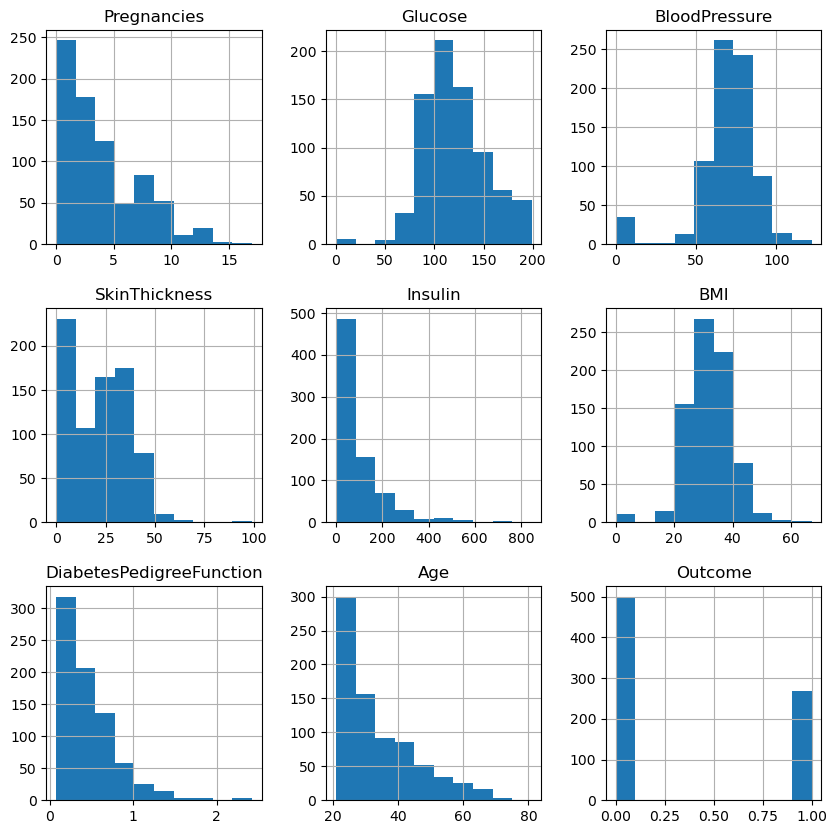

In [5]:
plot1 = dset.hist(figsize=[10,10])    # displays histograms of the DataFrame columns

* are there any issues with the *diabetes* dataset?
    - As we can see glucose, bloodpressure and bmi has few zero values which can say that there must have been na values replaced with zero which makes the data frame corrupted. Also there is class imbalance (outcome variable)

In [6]:
# Use `replace` to replace values in the columns. Here we replace any "0" by "NaN" (not a number - which represents missing values in Python)
dset = dset.replace({'BMI' : 0, 'BloodPressure' : 0, 'Glucose' : 0, 'Insulin' : 0, 'SkinThickness' : 0}, np.nan)
dset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
dset.isna().sum()     # shows the number of missings per column

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
dset = dset.dropna()    # drops rows with missing values
dset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* Now we could say the data is ready for use.

### Using the `sklearn` library
*scikit-learn* library or "sklearn", in short, is the most popular library for machine learning modelling in Python. 
Please, follow this link for it official documentation: https://scikit-learn.org/stable/

We will use the library for most of the *Data Mining* module. In this tutorial, it will be used for modelling the *diabetes* data with Logistic Regression and for model evaluation.

1. split the data into a traning and a test subset. Use 80% of the data for training and 20% for testing.


In [9]:
from sklearn.model_selection import train_test_split      # imports function to splits the data
X_train, X_test, y_train, y_test = train_test_split(dset.drop('Outcome', axis=1), dset['Outcome'], test_size=0.2, random_state=123)  # splits 80% training, 20% test

2. train a logistic regression model using the training subset. Use the `LogisticRegression` class from the `sklearn.linear_model` module.

In [10]:
from sklearn.linear_model import LogisticRegression   # imports the logistic regression module implemented in sklearn
mdl = LogisticRegression(max_iter = 1000)    # sets up the algorithm (or learner)
mdl.fit(X_train, y_train)    # fits the model to the training data

LogisticRegression(max_iter=1000)

3. predict new outputs (classes and class probabilities) using the test subset.


In [11]:
y_pred = mdl.predict(X_test)    # predicts the test data
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
y_pred_prob = mdl.predict_proba(X_test)[:,1]    # predicts the probability of the test data
y_pred_prob

array([0.1370357 , 0.53795047, 0.55591481, 0.30405325, 0.5216278 ,
       0.17384861, 0.01673007, 0.06314605, 0.41818461, 0.08477386,
       0.87460478, 0.10230841, 0.40463767, 0.36043976, 0.47038138,
       0.64954008, 0.75535688, 0.2847141 , 0.86057215, 0.38006157,
       0.18725924, 0.15839335, 0.07459557, 0.81739194, 0.13746347,
       0.29547974, 0.12744366, 0.03961439, 0.37478519, 0.03253216,
       0.07213896, 0.12054222, 0.1255248 , 0.08504529, 0.05338111,
       0.86773578, 0.25686069, 0.16020718, 0.09106353, 0.48008549,
       0.14773849, 0.20340535, 0.13663718, 0.18297053, 0.73386128,
       0.61457531, 0.3476821 , 0.26891221, 0.19805393, 0.66363853,
       0.02925348, 0.24503575, 0.10718784, 0.06660926, 0.55620879,
       0.26296515, 0.01001937, 0.06671298, 0.02418021, 0.33563324,
       0.10808174, 0.49345105, 0.1473113 , 0.0626034 , 0.07636642,
       0.45774389, 0.1677129 , 0.49643563, 0.25019014, 0.35773987,
       0.86120076, 0.04648455, 0.39464167, 0.30329766, 0.28825

4. evaluate the model performance using the test subset. Use the `classification_report` function from the `sklearn.metrics` module.

In [13]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))
print("AUC: ", roc_auc_score(y_test, y_pred_prob))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))

Accuracy:  0.7341772151898734
Precision:  0.6428571428571429
Recall:  0.36
F1:  0.4615384615384615
AUC:  0.8266666666666667
Confusion Matrix:  [[49  5]
 [16  9]]
Classification Report:                precision    recall  f1-score   support

           0       0.75      0.91      0.82        54
           1       0.64      0.36      0.46        25

    accuracy                           0.73        79
   macro avg       0.70      0.63      0.64        79
weighted avg       0.72      0.73      0.71        79



5. Plot the ROC and PR curves. Use the `RocCurveDisplay` and `PrecisionRecallDisplay` classes from the `sklearn.metrics` module.

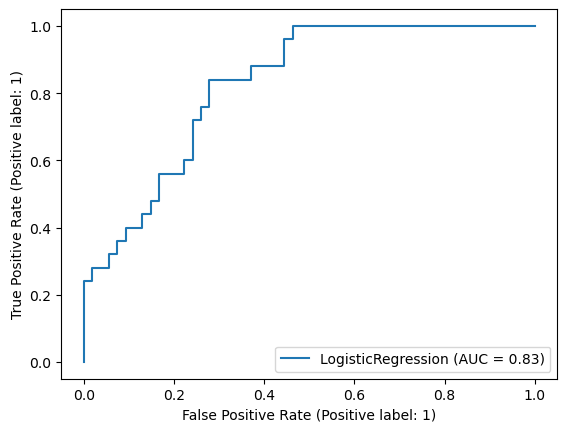

In [14]:
# Plot the ROC curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(mdl, X_test, y_test)

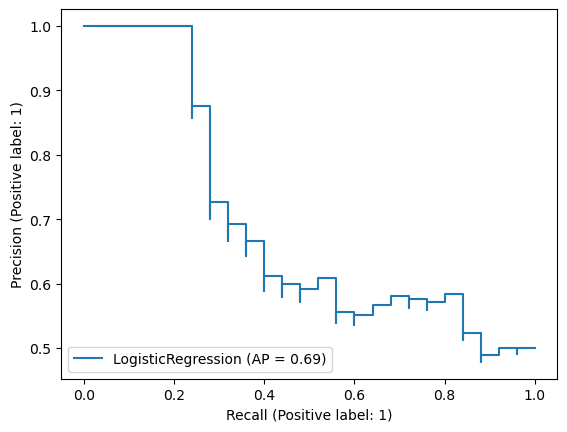

In [15]:
# Plot Precision-Recall curve
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(mdl, X_test, y_test)

6. Explain the quality of the model performance.
7. To display the confusion matrix, we can alternatively use the `confusionMatrixDisplay` class from the `sklearn.metrics` module.

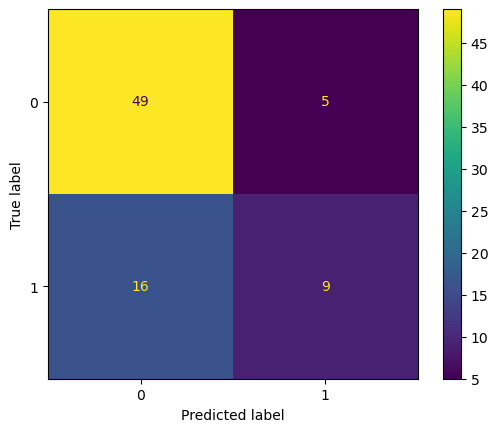

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl.classes_).plot()

8. THe above confusion matrix assumes that the cut-off for the class probability is 0.5. What happens if we change the cut-off to 0.3? What happens if we change the cut-off to 0.7? We can use the Youden's index to find the optimal cut-off. Use the `roc_curve` function from the `sklearn.metrics` module to find the optimal cut-off.

In [17]:
# computes TPR, FPR, and thresholds
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


In [18]:
# Use Youden's J statistic to find the optimal threshold
J = tpr - fpr
ix = np.argmax(J)
print('Best Threshold=%f, J=%.3f' % (thresholds[ix], J[ix]))

Best Threshold=0.256861, J=0.562


In [19]:
# Use the above cutoff to predict the class
y_class_opt = np.where(y_pred_prob > thresholds[ix], 1, 0)
y_class_opt

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [20]:
#Accuracy:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=y_test, y_pred=y_class_opt)

0.7468354430379747

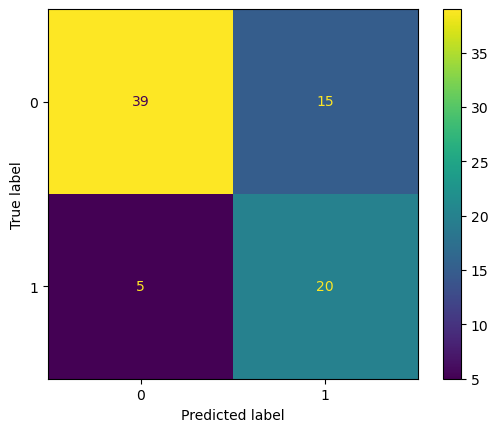

In [21]:
# New Confusion matrix:
cm_opt = confusion_matrix(y_true=y_test, y_pred=y_class_opt)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_opt, display_labels=mdl.classes_).plot()


9. Discuss the results. How the cut-off affects the model performance?

## Exercise 2
Repeat a similar analysis, but now using the “SAheart” dataset instead. The dataset is available on:
https://raw.githubusercontent.com/iaolier/7021DATSCI/main/data/SAheart.csv 

The South African Heart dataset (SAHeart): The dataset is publicly available, just type its name in Google. The dataset is a retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of Coronary Heart Disease (CHD). Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in Rousseauw et al, 1983, South African Medical Journal.
This is the set of variables in the dataset:

- sbp - systolic blood pressure
- tobacco - cumulative tobacco (kg)
- ldl - low densiity lipoprotein cholesterol
- adiposity
- famhist - family history of heart disease (Present, Absent)
- typea - type-A behavior
- obesity
- alcohol - current alcohol consumption
- age - age at onset
- chd - response, coronary heart disease

The aim is to predict the risk of CHD as a function of the other variables. This is essentially a classification task with two classes: CHD/No CHD (coded as 1 and 0, respectively).



In [22]:
# Your answer here
